In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sklearn.cluster as skl

In [2]:
data_path: str = ".." + os.altsep + "data"
file_path: str = data_path + os.altsep + "colors.csv"

In [3]:
df: pd.DataFrame = pd.read_csv(file_path, sep=";", usecols=["Color", "Red0", "Green0", "Blue0", "Intensity0"])
df

,Color,Red0,Green0,Blue0,Intensity0
0,Orange,17,19,14,5
1,Orange,17,20,14,5
2,Orange,17,20,14,5
3,Orange,17,20,14,5
4,Orange,17,20,14,5
...,...,...,...,...,...
8202,Red,32,39,30,10
8203,Red,32,39,30,10
8204,Red,32,39,30,10
8205,Red,32,39,30,10


Black          Axes(0.1,0.679412;0.363636x0.220588)
Empty     Axes(0.536364,0.679412;0.363636x0.220588)
Green          Axes(0.1,0.414706;0.363636x0.220588)
Orange    Axes(0.536364,0.414706;0.363636x0.220588)
Red                Axes(0.1,0.15;0.363636x0.220588)
Yellow        Axes(0.536364,0.15;0.363636x0.220588)
dtype: object

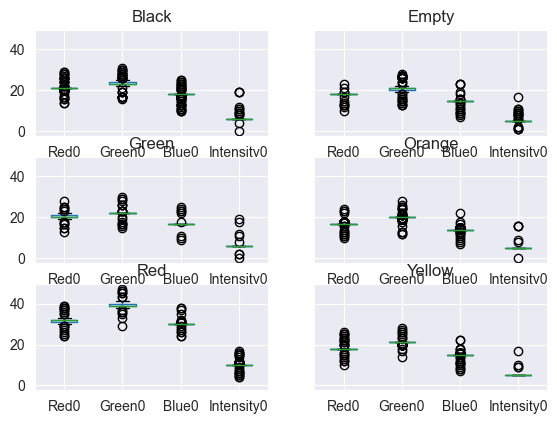

In [4]:
df.groupby("Color").boxplot()

<Axes: >

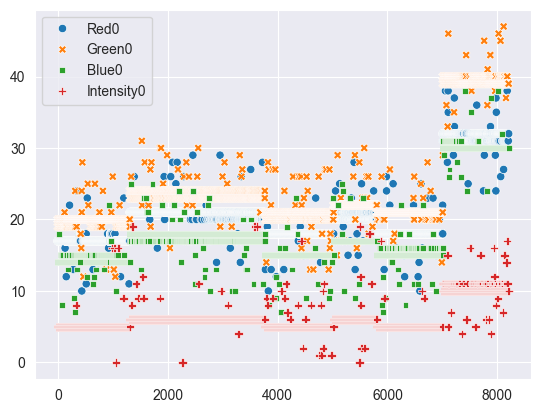

In [5]:
sns.scatterplot(df)

In [28]:
train = df.sample(frac=.7)
test = df.drop(train.index)
#colors = train.pop("Color")
train

,Color,Red0,Green0,Blue0,Intensity0
1241,Orange,17,20,14,5
39,Orange,17,20,14,5
5120,Green,21,22,17,6
3192,Black,21,24,18,6
1019,Orange,17,20,14,5
...,...,...,...,...,...
2292,Black,21,23,18,6
4744,Empty,18,21,15,5
2516,Black,20,24,18,6
2759,Black,21,23,18,6


In [23]:
model = skl.KMeans(n_clusters=6).fit(train)

In [24]:
model.labels_

array([0, 4, 2, ..., 0, 2, 2])

In [11]:
model.predict([[20,15,30,5]])

C:\Users\Franz\Desktop\Studium\Repos\color-sorter\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3])

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
#X = [train["Red0"].to_numpy(), train["Green0"].to_numpy(), train["Blue0"].to_numpy(), train["Intensity0"].to_numpy()]
X = [train[train["Color"] == "Red"], train[train["Color"] == "Black"], train[train["Color"] == "Green"]]
Y = ["Red", "Black", "Green"]

X

[     Color  Red0  Green0  Blue0  Intensity0
 8167   Red    32      39     30          10
 8173   Red    32      39     30          10
 7458   Red    31      39     30          10
 7464   Red    32      39     30          10
 7894   Red    31      39     30          10
 ...    ...   ...     ...    ...         ...
 7170   Red    32      40     31          11
 8098   Red    32      39     30          10
 7032   Red    31      39     30          10
 7252   Red    31      39     30          10
 7942   Red    31      39     30          10
 
 [823 rows x 5 columns],
       Color  Red0  Green0  Blue0  Intensity0
 3192  Black    21      24     18           6
 3128  Black    21      23     18           6
 1738  Black    21      23     18           6
 3385  Black    21      24     18           6
 2760  Black    21      23     18           6
 ...     ...   ...     ...    ...         ...
 1482  Black    21      24     18           6
 2275  Black    21      24     18           6
 2292  Black    21 

In [74]:
clf = RandomForestClassifier(n_estimators=6)
clf = clf.fit(X, Y)

ValueError: could not convert string to float: 'Red'

In [56]:
clf.predict([[5,3,6,7]])

ValueError: X has 4 features, but RandomForestClassifier is expecting 5745 features as input.